# Projet 5: notebook d'exploration

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from bs4 import BeautifulSoup
import re

# Importation des données

In [12]:
data = pd.read_csv("QueryResults.csv")[["Title", "Body", "Tags"]]

In [13]:
data.head()

,Title,Body,Tags
0,Spring MVC - AngularJS - File Upload - org.apa...,<p>I have a Java Spring MVC Web application as...,<java><spring><angularjs><spring-mvc><file-upl...
1,flutter - how to create forms in popup,<p>I want to create a form inside a pop-up wit...,<flutter><dart><popup><flutter-layout><flutter...
2,Abstraction VS Information Hiding VS Encapsula...,<p>Can you tell me what is the difference betw...,<encapsulation><abstraction><glossary><ooad><i...
3,What Are Some Examples of Design Pattern Imple...,<p>I'm a moderately skilled programmer using J...,<javascript><design-patterns><singleton><strat...
4,What's the best way to get to know linux or BS...,<p>I'd like to gain better knowledge of operat...,<linux><operating-system><kernel><bsd><osdev>


# Préparation du texte

In [14]:
# Mes fonctions
def traitement_tags(text):
    text = text.lower().replace("<", "").replace(">", " ").replace("-", " ")
    for key in dico.keys():
        text = text.replace(key, dico[key])
    return text

def traitement_titres(text, dico):
    text = text.lower()
    for key in dico.keys():
        text = text.replace(key, dico[key])
    text = re.sub(r'[^\w\s]', ' ', text).replace(' js ', ' javascript ')
    return text

def traitement_body(text, dico):
    soup = BeautifulSoup(text, 'html.parser')
    for code in soup.find_all('code'):
        code.extract()
    
    soup = soup.get_text().lower()
    soup = re.sub(r'http\S+', '', soup)
    for key in dico.keys():
        soup = soup.replace(key, dico[key])
    soup = re.sub(r'[^\w\s]', ' ', soup).replace('\n', ' ').replace(' js ', ' javascript ')
    return soup

In [15]:
dico = {'c#': 'csharp',
        'c++': 'cplusplus',
        '.net': 'dotnet',
        'n-d': 'nd'}

In [16]:
data["Tags"] = data["Tags"].apply(lambda x: traitement_tags(x))
data["Title"] = data["Title"].apply(lambda x: traitement_titres(x, dico))
data["Body"] = data["Body"].apply(lambda x: traitement_body(x, dico))

In [17]:
data

,Title,Body,Tags
0,spring mvc angularjs file upload org apa...,i have a java spring mvc web application as se...,java spring angularjs spring mvc file upload
1,flutter how to create forms in popup,i want to create a form inside a pop up with f...,flutter dart popup flutter layout flutter form...
2,abstraction vs information hiding vs encapsula...,can you tell me what is the difference between...,encapsulation abstraction glossary ooad inform...
3,what are some examples of design pattern imple...,i m a moderately skilled programmer using java...,javascript design patterns singleton strategy ...
4,what s the best way to get to know linux or bs...,i d like to gain better knowledge of operating...,linux operating system kernel bsd osdev
...,...,...,...
27548,how does keras 1d convolution layer work with ...,i am currently developing a text classificatio...,python tensorflow keras conv neural network wo...
27549,clean architecture design pattern,i have some question about this pattern the...,java rest design patterns microservices clean ...
27550,how to do nd distance and nearest neighbor cal...,this question is intended to be a canonical du...,python arrays numpy scikit learn scipy
27551,android studio emulator is not working on wind...,i have windows 11 on my system the system spe...,android studio android emulator avd hypervisor...


# Tokenisation

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

In [19]:
def tokenisation(text):
    text_token = word_tokenize(text)
    return text_token

def get_nouns(tokens):
    tag_tokens = nltk.pos_tag(tokens)
    return  [w[0] for w in tag_tokens if w[1] == 'NN']

def remove_stop_words(tokens, stop_words):
    filtered_tokens = [w for w in tokens if not w in stop_words]
    return filtered_tokens

def lemmatisation(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in tokens]

def stemmatisation(tokens):
    snowball = SnowballStemmer("english")
    return [snowball.stem(w) for w in tokens]


In [20]:
stop_words = set(stopwords.words('english'))

In [21]:
data['title_bow_lem'] = data['Title']
data['body_bow_lem'] = data['Body']
data

,Title,Body,Tags,title_bow_lem,body_bow_lem
0,spring mvc angularjs file upload org apa...,i have a java spring mvc web application as se...,java spring angularjs spring mvc file upload,spring mvc angularjs file upload org apa...,i have a java spring mvc web application as se...
1,flutter how to create forms in popup,i want to create a form inside a pop up with f...,flutter dart popup flutter layout flutter form...,flutter how to create forms in popup,i want to create a form inside a pop up with f...
2,abstraction vs information hiding vs encapsula...,can you tell me what is the difference between...,encapsulation abstraction glossary ooad inform...,abstraction vs information hiding vs encapsula...,can you tell me what is the difference between...
3,what are some examples of design pattern imple...,i m a moderately skilled programmer using java...,javascript design patterns singleton strategy ...,what are some examples of design pattern imple...,i m a moderately skilled programmer using java...
4,what s the best way to get to know linux or bs...,i d like to gain better knowledge of operating...,linux operating system kernel bsd osdev,what s the best way to get to know linux or bs...,i d like to gain better knowledge of operating...
...,...,...,...,...,...
27548,how does keras 1d convolution layer work with ...,i am currently developing a text classificatio...,python tensorflow keras conv neural network wo...,how does keras 1d convolution layer work with ...,i am currently developing a text classificatio...
27549,clean architecture design pattern,i have some question about this pattern the...,java rest design patterns microservices clean ...,clean architecture design pattern,i have some question about this pattern the...
27550,how to do nd distance and nearest neighbor cal...,this question is intended to be a canonical du...,python arrays numpy scikit learn scipy,how to do nd distance and nearest neighbor cal...,this question is intended to be a canonical du...
27551,android studio emulator is not working on wind...,i have windows 11 on my system the system spe...,android studio android emulator avd hypervisor...,android studio emulator is not working on wind...,i have windows 11 on my system the system spe...


In [22]:
for c in ['title_bow_lem', 'body_bow_lem']:
    data[c] = data[c].apply(lambda x: tokenisation(x))
    data[c] = data[c].apply(lambda x: get_nouns(x))
    data[c] = data[c].apply(lambda x: remove_stop_words(x, stop_words))

data['title_bow_stem'] = data['title_bow_lem']
data['body_bow_stem'] = data['body_bow_lem']

In [23]:
data['title_bow_stem'] = data['title_bow_stem'].apply(lambda x: stemmatisation(x))
data['title_bow_lem'] = data['title_bow_lem'].apply(lambda x: lemmatisation(x))
data['body_bow_stem'] = data['body_bow_stem'].apply(lambda x: stemmatisation(x))
data['body_bow_lem'] = data['body_bow_lem'].apply(lambda x: lemmatisation(x))

In [24]:
data['Tags'] = data['Tags'].apply(lambda x: tokenisation(x))
data['Tags'] = data['Tags'].apply(lambda x: list(set(x)))

In [25]:
data

,Title,Body,Tags,title_bow_lem,body_bow_lem,title_bow_stem,body_bow_stem
0,spring mvc angularjs file upload org apa...,i have a java spring mvc web application as se...,"[java, spring, file, mvc, angularjs, upload]","[spring, mvc, angularjs, file, org, apache, fi...","[java, spring, mvc, application, server, angul...","[spring, mvc, angularj, file, org, apach, file...","[java, spring, mvc, applic, server, angularj, ..."
1,flutter how to create forms in popup,i want to create a form inside a pop up with f...,"[popup, builder, form, dart, flutter, layout]","[flutter, popup]","[form, pop, flutter, image, flutter]","[flutter, popup]","[form, pop, flutter, imag, flutter]"
2,abstraction vs information hiding vs encapsula...,can you tell me what is the difference between...,"[encapsulation, abstraction, ooad, information...","[abstraction, v, information, v, encapsulation]","[difference, abstraction, information, hiding,...","[abstract, vs, inform, vs, encapsul]","[differ, abstract, inform, hide, softwar, deve..."
3,what are some examples of design pattern imple...,i m a moderately skilled programmer using java...,"[strategy, factory, design, singleton, pattern...","[design, javascript]","[programmer, javascript, guru, dom, manipulati...","[design, javascript]","[programm, javascript, guru, dom, manipul, des..."
4,what s the best way to get to know linux or bs...,i d like to gain better knowledge of operating...,"[linux, osdev, kernel, operating, bsd, system]","[way, linux, bsd]","[knowledge, operating, system, management, mem...","[way, linux, bsd]","[knowledg, oper, system, manag, memori, manag,..."
...,...,...,...,...,...,...,...
27548,how does keras 1d convolution layer work with ...,i am currently developing a text classificatio...,"[keras, embedding, conv, neural, python, word,...","[convolution, layer, work, word, classificatio...","[text, classification, tool, validation, accur...","[convolut, layer, work, word, classif, problem...","[text, classif, tool, valid, accuraci, head, c..."
27549,clean architecture design pattern,i have some question about this pattern the...,"[java, design, architecture, clean, rest, micr...","[architecture, design, pattern]","[question, pattern, database, layer, work, rea...","[architectur, design, pattern]","[question, pattern, databas, layer, work, real..."
27550,how to do nd distance and nearest neighbor cal...,this question is intended to be a canonical du...,"[scikit, learn, arrays, numpy, python, scipy]","[distance, neighbor]","[question, duplicate, target, distance, shape,...","[distanc, neighbor]","[question, duplic, target, distanc, shape, poi..."
27551,android studio emulator is not working on wind...,i have windows 11 on my system the system spe...,"[windows, avd, hypervisor, 11, android, emulat...","[studio, emulator, whpx]","[system, system, specifiction, edition, home, ...","[studio, emul, whpx]","[system, system, specifict, edit, home, langua..."


In [26]:
data['tags_stem'] = data['Tags'].apply(lambda x: stemmatisation(x))
data['tags_lem'] = data['Tags'].apply(lambda x: lemmatisation(x))

In [27]:
data.to_csv('data.csv', index=False)

# Analyse univariée

## Longueur des questions

In [28]:
df = data[['title_bow_lem', 'body_bow_lem', 'tags_lem']]

In [29]:
def get_nbr_tokens(data):
    nbr_tokens = pd.DataFrame()
    for c in data.columns:
        nbr_tokens[c] = data[c].apply(lambda x: len(x))
    return nbr_tokens

In [30]:
nbr_tokens = get_nbr_tokens(df)

nbr_tokens.describe()

,title_bow_lem,body_bow_lem,tags_lem
count,27553.000000,27553.000000,27553.000000
mean,3.123616,23.624469,5.926832
std,1.595205,25.830369,1.064494
min,0.000000,0.000000,3.000000
25%,2.000000,10.000000,5.000000
50%,3.000000,17.000000,6.000000
75%,4.000000,29.000000,6.000000
max,16.000000,739.000000,15.000000


In [31]:
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
# Un point rouge indiquera la moyenne dans les boxplots

<AxesSubplot:>

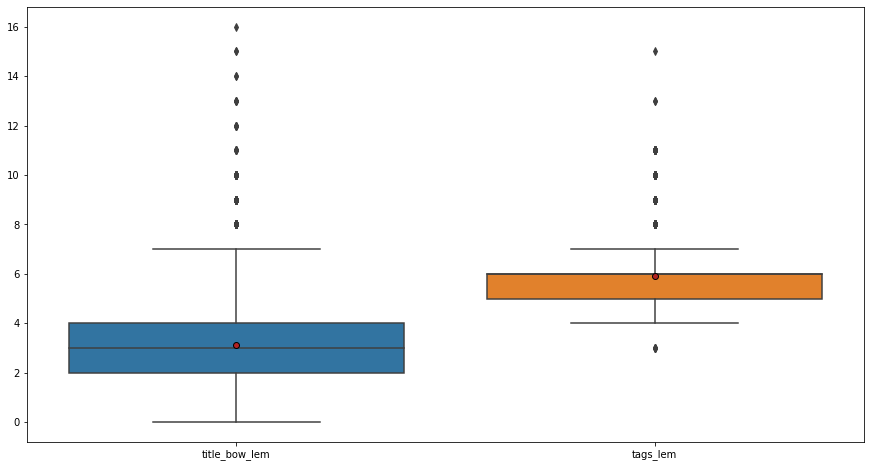

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(data=nbr_tokens[['title_bow_lem', 'tags_lem']], showmeans=True, meanprops=meanprops)

<AxesSubplot:>

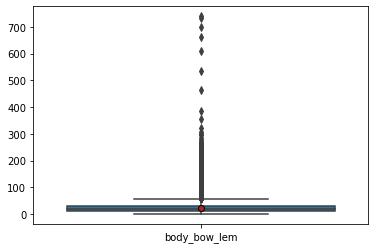

In [33]:
sns.boxplot(data=nbr_tokens[['body_bow_lem']], showmeans=True, meanprops=meanprops)

## Les termes les plus fréquents

### Avec wordcloud

In [34]:
from wordcloud import WordCloud

In [35]:
def show_wordcloud_image(data_c):
    l = []
    for i in range(0, data_c.shape[0]):
        l.extend(data_c.iloc[i])
    text = ' '.join(l)
    wordcloud = WordCloud().generate(text)
    plt.figure(figsize=(14, 12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

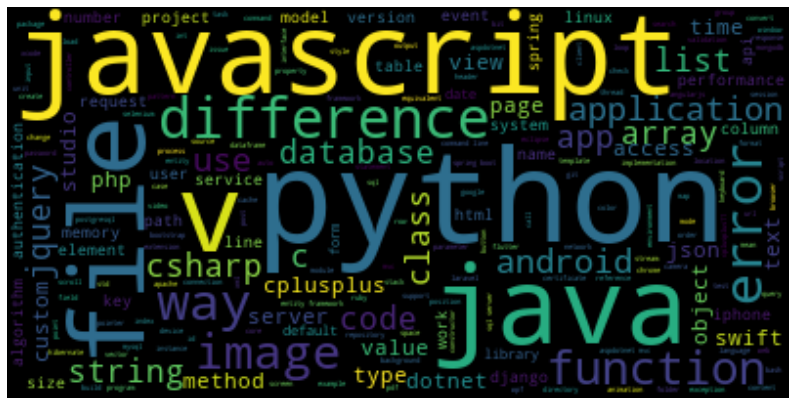

In [36]:
show_wordcloud_image(data['title_bow_lem'])

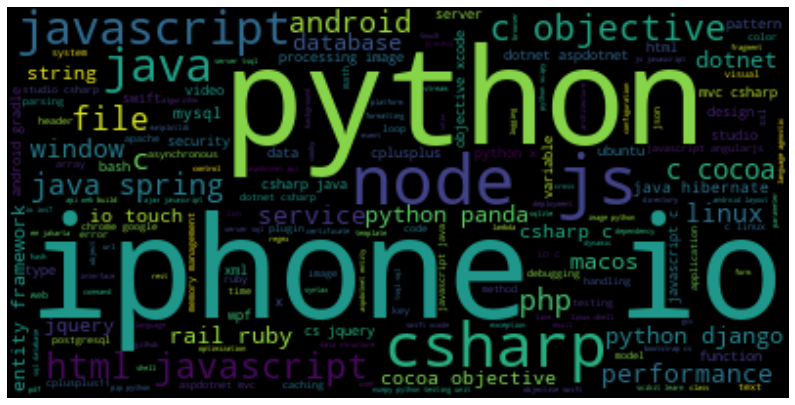

In [37]:
show_wordcloud_image(data['tags_lem'])

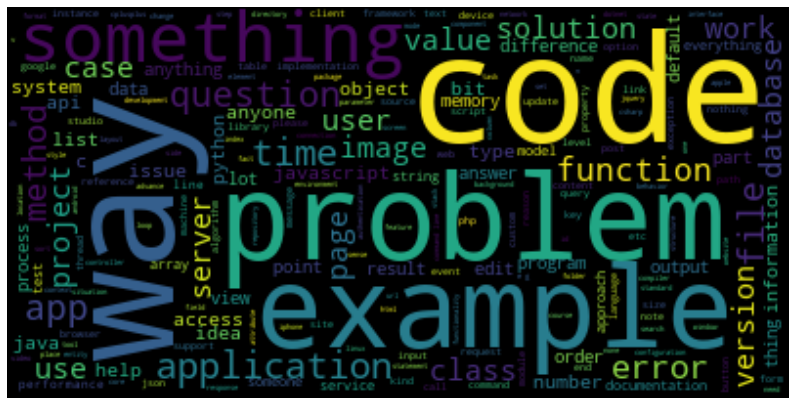

In [38]:
show_wordcloud_image(data['body_bow_lem'])

### Sans wordcloud

In [39]:
def get_nbr_occurance(data_c):
    l = []
    for i in range(0, data_c.shape[0]):
        l.extend(data_c.iloc[i])
    dictionnaire = {i: l.count(i) for i in set(l)}
    df = pd.DataFrame(dictionnaire, index=['count']).T
    df = df.sort_values(by='count', ascending=False)
    df.reset_index(inplace=True)
    return df

In [40]:
# occurance_title_lem = get_nbr_occurance(data['title_bow_lem'])
# occurance_body_lem = get_nbr_occurance(data['body_bow_lem'])
# occurance_tags_lem = get_nbr_occurance(data['tags_lem'])

In [41]:
# occurance_title_stem = get_nbr_occurance(data['title_bow_stem'])
# occurance_body_stem = get_nbr_occurance(data['body_bow_stem'])
# occurance_tags_stem = get_nbr_occurance(data['tags_stem'])

In [42]:
# occurance_title_lem.to_csv('occurance_title_lem.csv', index=False)
# occurance_body_lem.to_csv('occurance_body_lem.csv', index=False)
# occurance_tags_lem.to_csv('occurance_tags_lem.csv', index=False)
# occurance_title_stem.to_csv('occurance_title_stem.csv', index=False)
# occurance_body_stem.to_csv('occurance_body_stem.csv', index=False)
# occurance_tags_stem.to_csv('occurance_tags_stem.csv', index=False)

In [43]:
occurance_title_lem = pd.read_csv('occurance_title_lem.csv')
occurance_body_lem = pd.read_csv('occurance_body_lem.csv')
occurance_tags_lem = pd.read_csv('occurance_tags_lem.csv')
occurance_title_stem = pd.read_csv('occurance_title_stem.csv')
occurance_body_stem = pd.read_csv('occurance_body_stem.csv')
occurance_tags_stem = pd.read_csv('occurance_tags_stem.csv')

In [44]:
def removeall(l, a_retirer):
    for o in a_retirer:
        while o in l:
            l.remove(o)
    return l

### Titres

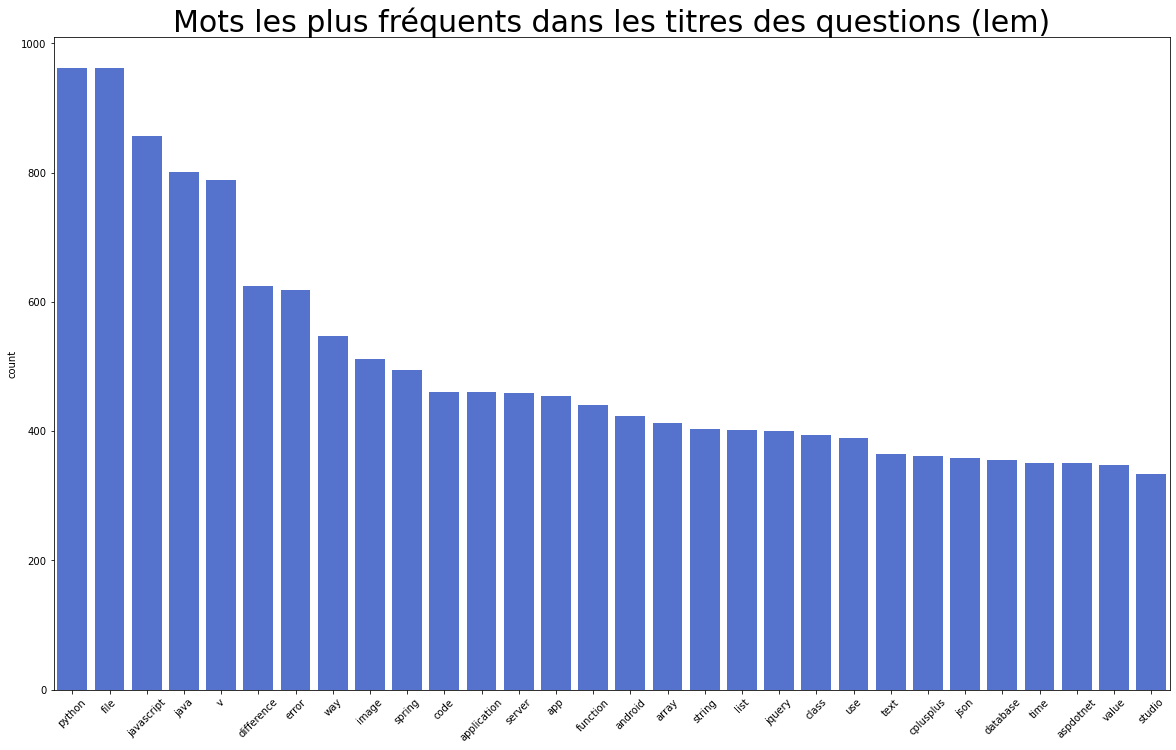

In [45]:
plt.figure(figsize=(20,12))
g = sns.barplot(x=occurance_title_lem.head(30)['index'], y=occurance_title_lem.head(30)['count'], color='royalblue')
g.set_title('Mots les plus fréquents dans les titres des questions (lem)', fontdict = {'fontsize':30})
plt.xticks(rotation=45)
plt.xlabel("")
plt.show()

In [46]:
a_retirer = ['error', 'way']
data['title_bow_lem'] = data['title_bow_lem'].apply(lambda x: removeall(x, a_retirer))

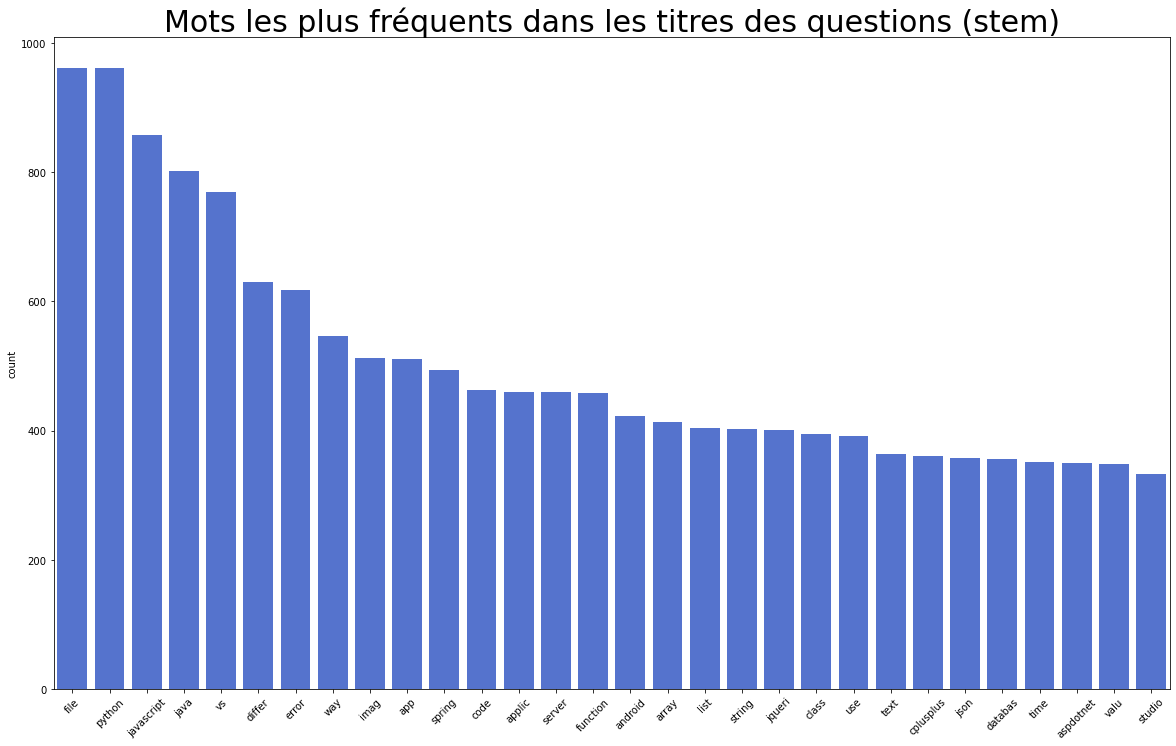

In [47]:
plt.figure(figsize=(20,12))
g = sns.barplot(x=occurance_title_stem.head(30)['index'], y=occurance_title_stem.head(30)['count'], color='royalblue')
g.set_title('Mots les plus fréquents dans les titres des questions (stem)', fontdict = {'fontsize':30})
plt.xticks(rotation=45)
plt.xlabel("")
plt.show()

In [48]:
a_retirer = ['error', 'way']
data['title_bow_stem'] = data['title_bow_stem'].apply(lambda x: removeall(x, a_retirer))

### Body

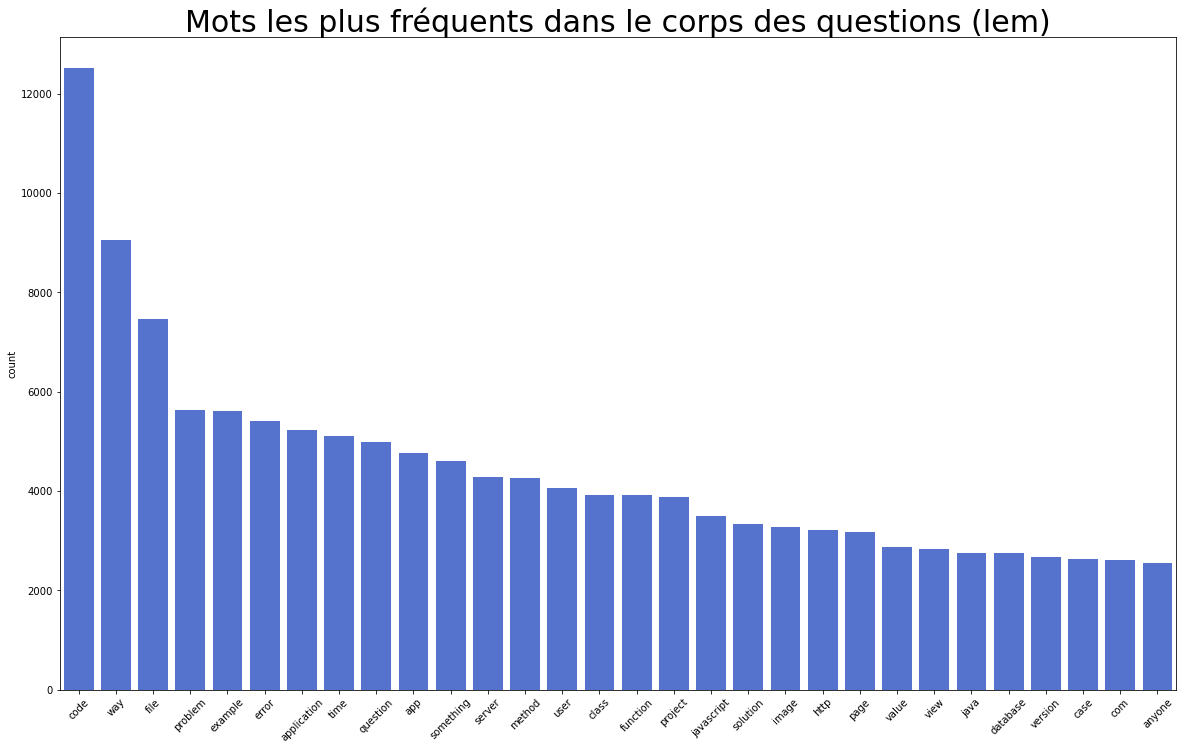

In [49]:
plt.figure(figsize=(20,12))
g = sns.barplot(x=occurance_body_lem.head(30)['index'], y=occurance_body_lem.head(30)['count'], color='royalblue')
g.set_title('Mots les plus fréquents dans le corps des questions (lem)', fontdict = {'fontsize':30})
plt.xticks(rotation=45)
plt.xlabel("")
plt.show()

In [50]:
a_retirer = ['code', 'way', 'problem', 'example', 'error', 'question', 'something', 'http', 'com', 'anyone']
data['body_bow_lem'] = data['body_bow_lem'].apply(lambda x: removeall(x, a_retirer))

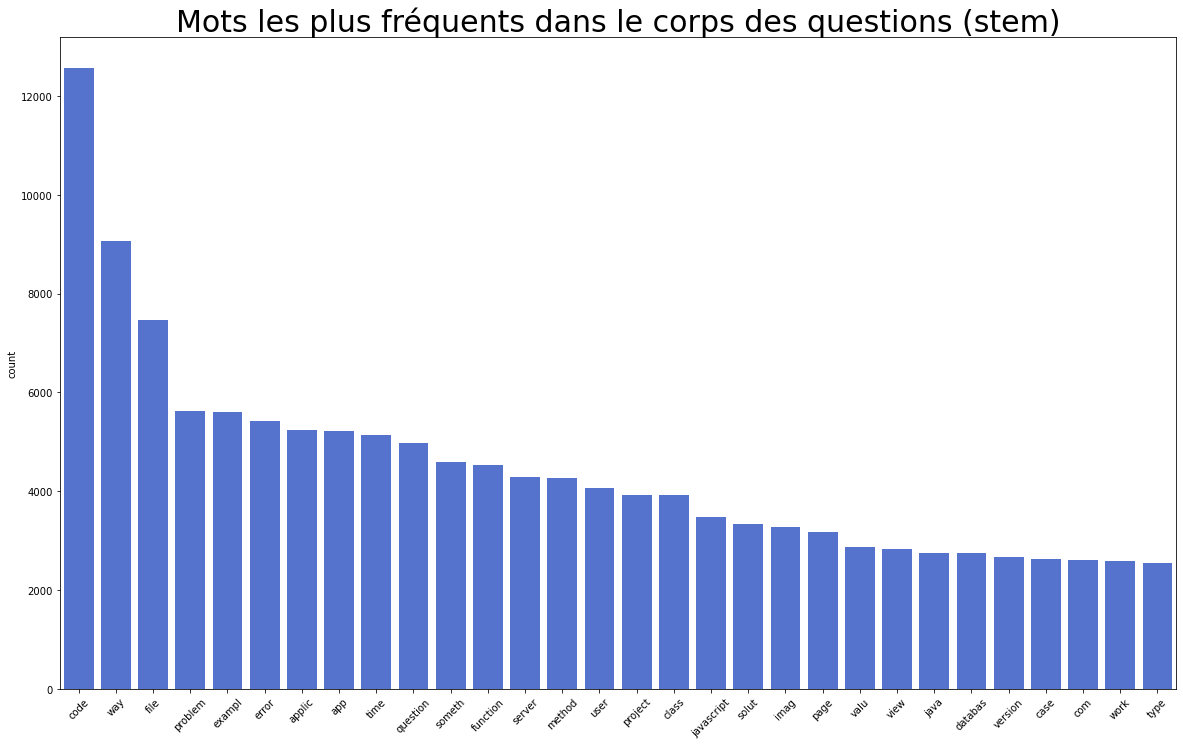

In [51]:
plt.figure(figsize=(20,12))
g = sns.barplot(x=occurance_body_stem.head(30)['index'], y=occurance_body_stem.head(30)['count'], color='royalblue')
g.set_title('Mots les plus fréquents dans le corps des questions (stem)', fontdict = {'fontsize':30})
plt.xticks(rotation=45)
plt.xlabel("")
plt.show()

In [52]:
a_retirer = ['code', 'way', 'problem', 'exampl', 'error', 'question', 'someth', 'com']
data['body_bow_stem'] = data['body_bow_stem'].apply(lambda x: removeall(x, a_retirer))

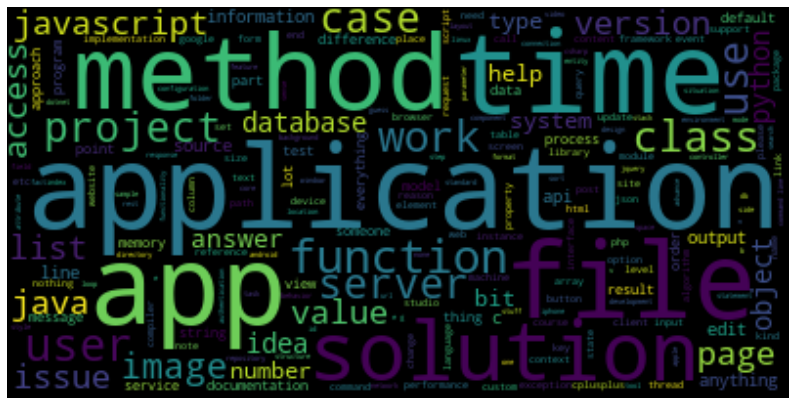

In [53]:
show_wordcloud_image(data['body_bow_lem'])

### Tags

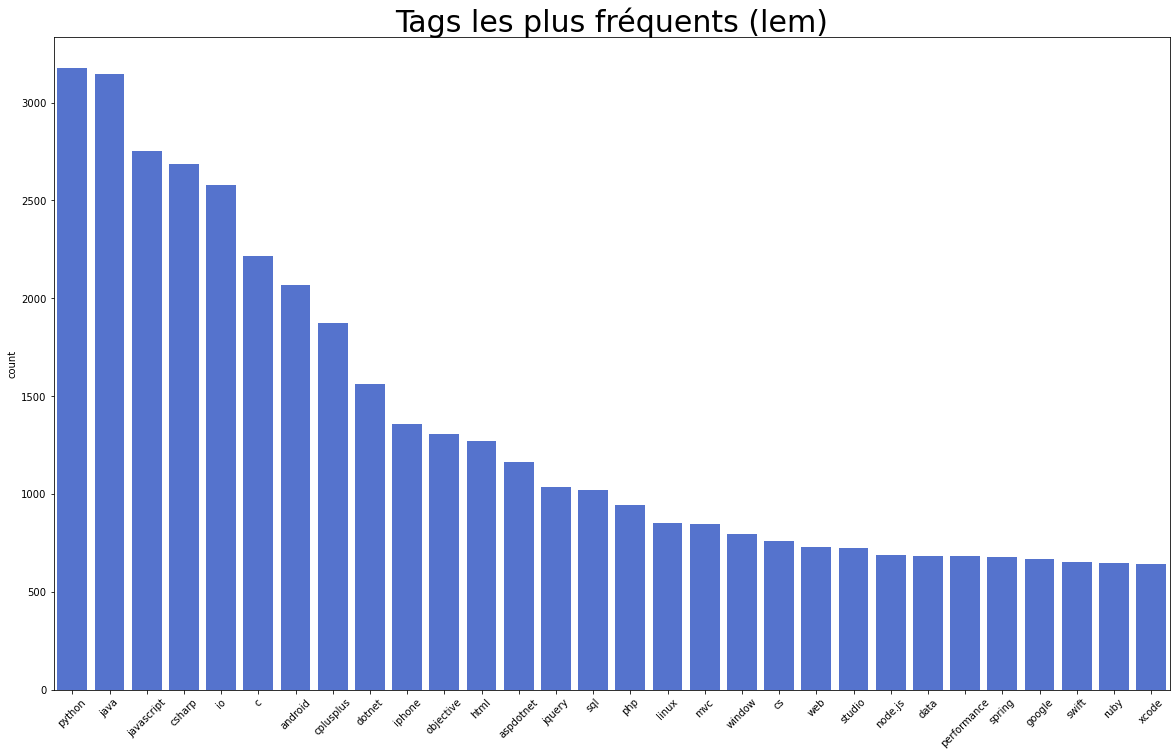

In [54]:
plt.figure(figsize=(20,12))
g = sns.barplot(x=occurance_tags_lem.head(30)['index'], y=occurance_tags_lem.head(30)['count'], color='royalblue')
g.set_title('Tags les plus fréquents (lem)', fontdict = {'fontsize':30})
plt.xticks(rotation=45)
plt.xlabel("")
plt.show()

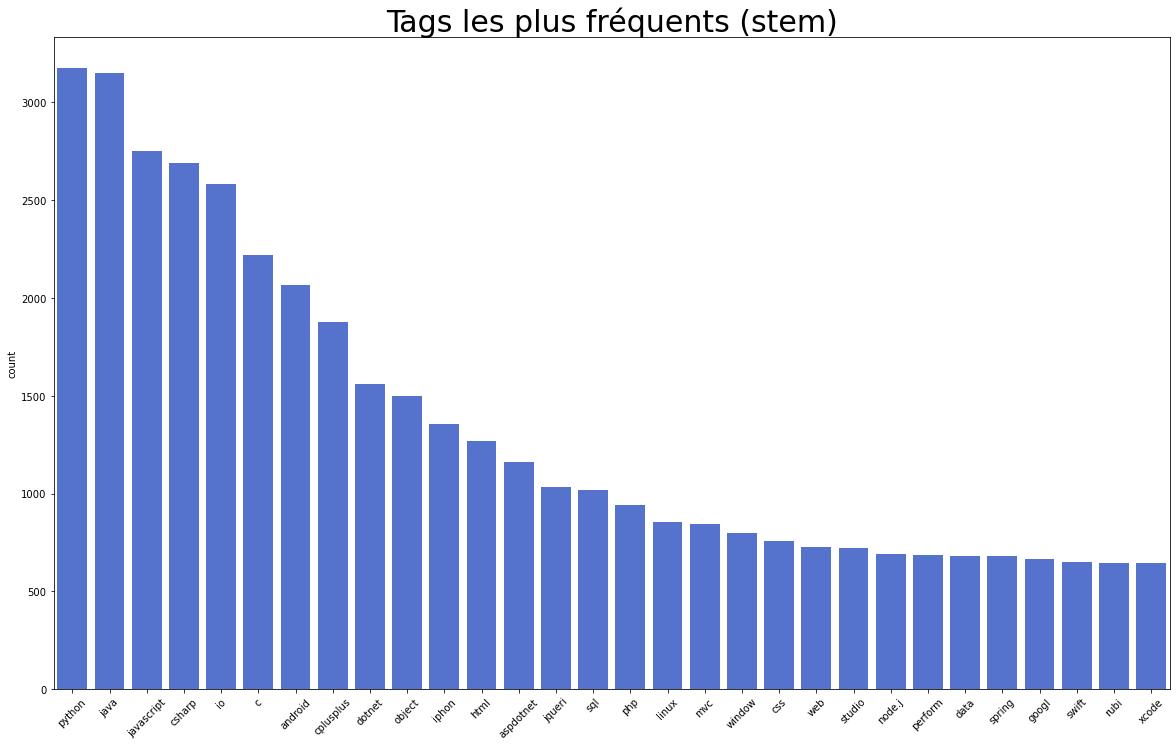

In [55]:
plt.figure(figsize=(20,12))
g = sns.barplot(x=occurance_tags_stem.head(30)['index'], y=occurance_tags_stem.head(30)['count'], color='royalblue')
g.set_title('Tags les plus fréquents (stem)', fontdict = {'fontsize':30})
plt.xticks(rotation=45)
plt.xlabel("")
plt.show()

In [56]:
occurance_tags = get_nbr_occurance(data['Tags'])

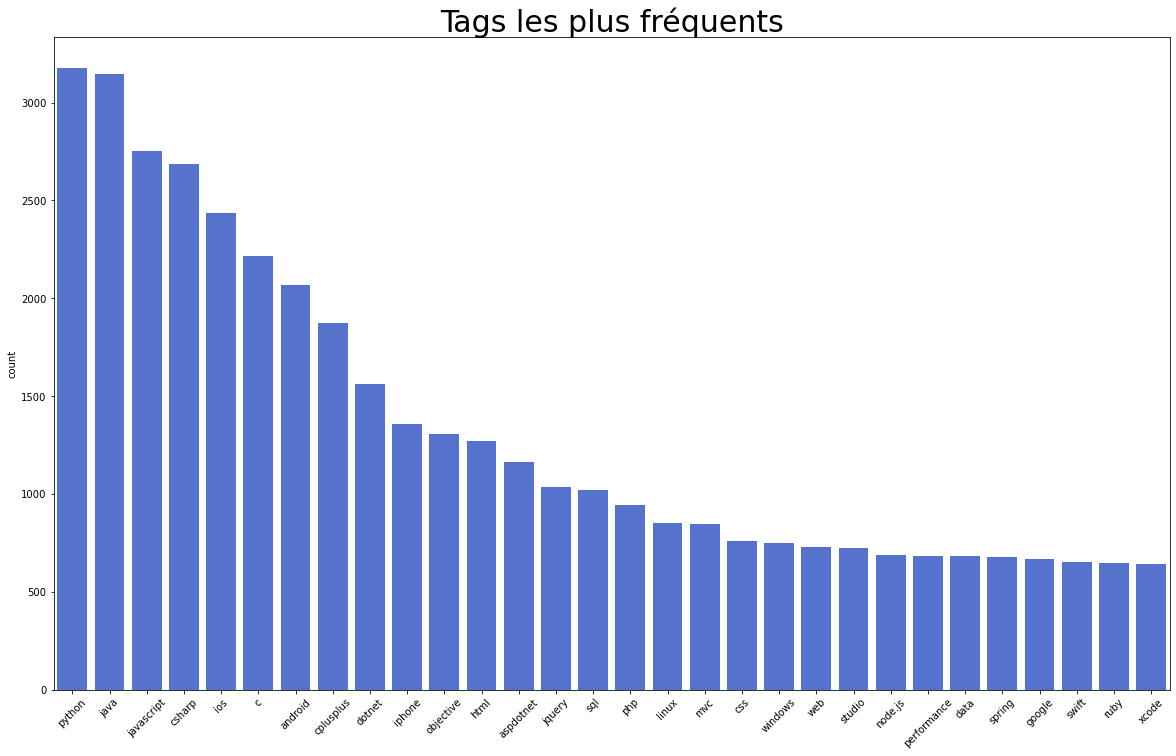

In [57]:
plt.figure(figsize=(20,12))
g = sns.barplot(x=occurance_tags.head(30)['index'], y=occurance_tags.head(30)['count'], color='royalblue')
g.set_title('Tags les plus fréquents', fontdict = {'fontsize':30})
plt.xticks(rotation=45)
plt.xlabel("")
plt.show()

In [58]:
list_50_tags = list(occurance_tags.iloc[:50]['index'].values)

In [59]:
data['Tags'] = data['Tags'].apply(lambda x: [t for t in x if t in list_50_tags])

In [60]:
data['Tags'] = data['Tags'].apply(lambda x: ' '.join([s for s in x]))
data = data[data['Tags']!='']
data['Tags'] = data['Tags'].apply(lambda x: tokenisation(x))

C:\Users\tony.mathieux\AppData\Local\Temp\ipykernel_49824\3909227897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tags'] = data['Tags'].apply(lambda x: tokenisation(x))


In [61]:
data = data.drop(['tags_lem', 'tags_stem'], axis=1)

In [66]:
data

,Title,Body,Tags,title_bow_lem,body_bow_lem,title_bow_stem,body_bow_stem
0,spring mvc angularjs file upload org apa...,i have a java spring mvc web application as se...,"[java, spring, file, mvc]","[spring, mvc, angularjs, file, org, apache, fi...","[java, spring, mvc, application, server, angul...","[spring, mvc, angularj, file, org, apach, file...","[java, spring, mvc, applic, server, angularj, ..."
3,what are some examples of design pattern imple...,i m a moderately skilled programmer using java...,"[design, javascript]","[design, javascript]","[programmer, javascript, guru, dom, manipulati...","[design, javascript]","[programm, javascript, guru, dom, manipul, des..."
4,what s the best way to get to know linux or bs...,i d like to gain better knowledge of operating...,[linux],"[linux, bsd]","[knowledge, operating, system, management, mem...","[linux, bsd]","[knowledg, oper, system, manag, memori, manag,..."
5,is there a performance difference between i ...,is there a performance difference between and...,"[c, performance]","[performance, difference, c]","[performance, difference, value]","[perform, differ, c]","[perform, differ, valu]"
6,is there a performance difference between i ...,we have the question is there a performance di...,"[performance, cplusplus]","[performance, difference, cplusplus]","[performance, difference, c, answer, cplusplus]","[perform, differ, cplusplus]","[perform, differ, c, answer, cplusplus]"
...,...,...,...,...,...,...,...
27548,how does keras 1d convolution layer work with ...,i am currently developing a text classificatio...,[python],"[convolution, layer, work, word, classificatio...","[text, classification, tool, validation, accur...","[convolut, layer, work, word, classif, problem...","[text, classif, tool, valid, accuraci, head, c..."
27549,clean architecture design pattern,i have some question about this pattern the...,"[java, design]","[architecture, design, pattern]","[pattern, database, layer, work, reality, enti...","[architectur, design, pattern]","[pattern, databas, layer, work, realiti, entit..."
27550,how to do nd distance and nearest neighbor cal...,this question is intended to be a canonical du...,"[arrays, python]","[distance, neighbor]","[duplicate, target, distance, shape, point, po...","[distanc, neighbor]","[duplic, target, distanc, shape, point, point,..."
27551,android studio emulator is not working on wind...,i have windows 11 on my system the system spe...,"[windows, android, studio]","[studio, emulator, whpx]","[system, system, specifiction, edition, home, ...","[studio, emul, whpx]","[system, system, specifict, edit, home, langua..."


In [72]:
data.reset_index(inplace = True, drop = True)

In [74]:
data.to_csv('data.csv', index=False)